In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
#Use the citipy module to determine city based on lat. and long.
from citipy import citipy

In [14]:
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [17]:
import requests

In [18]:
#import weather api
from config import weather_api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging
print("Beginning Data retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | plaster rock
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | marcona
City not found. Skipping...
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | tondano
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | katobu
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | tarrafal
Processing Record 16 of Set 1 | warqla
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | serenje
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | yaan
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | port elizabeth


Processing Record 36 of Set 4 | vung tau
Processing Record 37 of Set 4 | batagay-alyta
Processing Record 38 of Set 4 | dzhebariki-khaya
Processing Record 39 of Set 4 | bayan
Processing Record 40 of Set 4 | byron bay
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | san cristobal
Processing Record 43 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 4 | troitsko-pechorsk
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | oume
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | tunceli
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | santa cruz de la palma
Processing Record 3 of Set 5 | marolambo
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | pampas
Processing Record 8 of Set 5 | arraial do cabo
Pro

Processing Record 27 of Set 8 | pathein
Processing Record 28 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 8 | mapiripan
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | ciudad bolivar
Processing Record 32 of Set 8 | tiznit
Processing Record 33 of Set 8 | tecoanapa
Processing Record 34 of Set 8 | lingao
Processing Record 35 of Set 8 | senador guiomard
Processing Record 36 of Set 8 | bud
Processing Record 37 of Set 8 | erenhot
Processing Record 38 of Set 8 | toftir
City not found. Skipping...
Processing Record 39 of Set 8 | tidore
City not found. Skipping...
Processing Record 40 of Set 8 | hudiksvall
Processing Record 41 of Set 8 | saint-pierre
Processing Record 42 of Set 8 | leningradskiy
Processing Record 43 of Set 8 | camacupa
Processing Record 44 of Set 8 | churapcha
Processing Record 45 of Set 8 | mozarlandia
Processing Record 46 of Set 8 | makakilo city
Processing Record 47 of Set 8 | bantry
Processing Record 48 of Set 8 | k

City not found. Skipping...
Processing Record 16 of Set 12 | bac lieu
Processing Record 17 of Set 12 | bilibino
Processing Record 18 of Set 12 | margate
Processing Record 19 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | muswellbrook
Processing Record 22 of Set 12 | ustrzyki dolne
Processing Record 23 of Set 12 | merauke
Processing Record 24 of Set 12 | sirsa
Processing Record 25 of Set 12 | qiqihar
Processing Record 26 of Set 12 | san policarpo
Processing Record 27 of Set 12 | kostolac
Processing Record 28 of Set 12 | benghazi
Processing Record 29 of Set 12 | dinghai
Processing Record 30 of Set 12 | odesskoye
Processing Record 31 of Set 12 | saint-ambroise
Processing Record 32 of Set 12 | kuzedeyevo
Processing Record 33 of Set 12 | deer lake
Processing Record 34 of Set 12 | juneau
Processing Record 35 of Set 12 | burica
City not found. Skipping...
Processing Record 36 of Set 12 | manvi
Processing Record 37 of Se

In [26]:
#Find how many good records were retrieved
len(city_data)

560

In [29]:
#Convert list into pandas Df
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.86,73,32,19.75,PF,2022-09-25 18:55:12
1,Chuy,-33.6971,-53.4616,62.42,64,94,13.49,UY,2022-09-25 18:55:12
2,Plaster Rock,46.9065,-67.3900,64.96,50,91,10.20,CA,2022-09-25 18:55:12
3,Punta Arenas,-53.1500,-70.9167,46.51,61,75,17.27,CL,2022-09-25 18:55:13
4,Alofi,-19.0595,-169.9187,73.29,100,100,4.61,NU,2022-09-25 18:50:59
5,Rikitea,-23.1203,-134.9692,68.34,59,0,16.04,PF,2022-09-25 18:55:14
6,Hobart,-42.8794,147.3294,48.06,85,40,11.50,AU,2022-09-25 18:55:14
7,Carnarvon,-24.8667,113.6333,63.37,56,0,23.53,AU,2022-09-25 18:55:14
8,Tondano,1.3038,124.9112,66.29,88,100,2.98,ID,2022-09-25 18:55:15
9,Jamestown,42.0970,-79.2353,63.01,76,100,12.66,US,2022-09-25 18:55:15


In [33]:
#Change the order of the DF columns
new_column_order= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-09-25 18:55:12,-9.8000,-139.0333,76.86,73,32,19.75
1,Chuy,UY,2022-09-25 18:55:12,-33.6971,-53.4616,62.42,64,94,13.49
2,Plaster Rock,CA,2022-09-25 18:55:12,46.9065,-67.3900,64.96,50,91,10.20
3,Punta Arenas,CL,2022-09-25 18:55:13,-53.1500,-70.9167,46.51,61,75,17.27
4,Alofi,NU,2022-09-25 18:50:59,-19.0595,-169.9187,73.29,100,100,4.61
5,Rikitea,PF,2022-09-25 18:55:14,-23.1203,-134.9692,68.34,59,0,16.04
6,Hobart,AU,2022-09-25 18:55:14,-42.8794,147.3294,48.06,85,40,11.50
7,Carnarvon,AU,2022-09-25 18:55:14,-24.8667,113.6333,63.37,56,0,23.53
8,Tondano,ID,2022-09-25 18:55:15,1.3038,124.9112,66.29,88,100,2.98
9,Jamestown,US,2022-09-25 18:55:15,42.0970,-79.2353,63.01,76,100,12.66


In [35]:
#Create an output file for a csv
output_data_file = "weather_data/cities.csv"
#Export the Data Frame to the csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [42]:
#Create Scatter plots.  Extract relevant data to the plot you will create
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


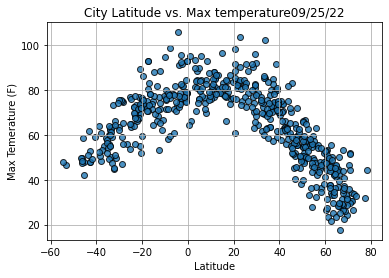

In [43]:
#Import time module
import time

#Build a scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Max temperature"+ time.strftime("%x"))
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show the plot
plt.show()

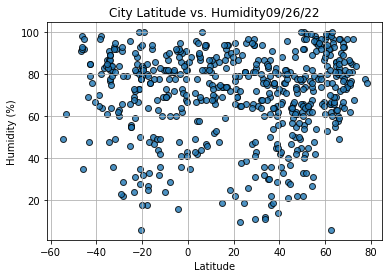

In [44]:
#Import time module
import time

#Build a scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show the plot
plt.show()

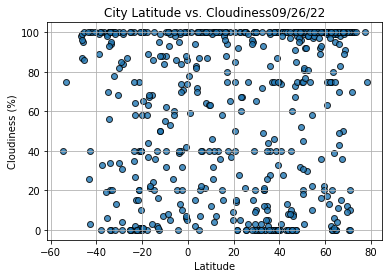

In [45]:
#Import time module
import time

#Build a scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show the plot
plt.show()

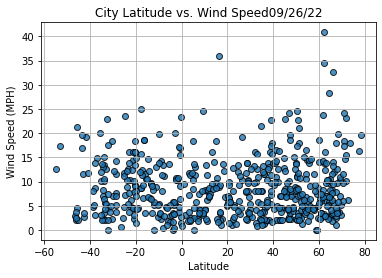

In [46]:
#Import time module
import time

#Build a scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show the plot
plt.show()